<a href="https://colab.research.google.com/github/charlierlee/google-colab/blob/master/hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

total amount of goods in S $26426.364373318513
total money possessed by buyers in T $34877.93314664619
total money remaining in buyers pocket before scaling: $8451.568773327675
amount of goods in S after scaling price by a factor of 1.303030303030303: total $34434.35357735442
total money remaining in buyers pocket after scaling $443.57956929176726


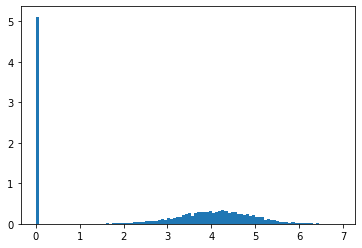

In [1]:
#https://stackoverflow.com/questions/47759577/creating-a-mixture-of-probability-distributions-for-sampling
#bla = np.arange(10)
#array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

import numpy as np
import matplotlib.pyplot as plt
productStd = 1
productMeanPrice = 3
buyerStd = 1
buyerMeanMoney = 5
productScalingFactor = 1.5
productMeanPrice = productMeanPrice * productScalingFactor
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": productMeanPrice, "scale": productStd}}, # A goods (our produts average at loc per item)
    {"type": np.random.normal, "kwargs": {"loc": buyerMeanMoney, "scale": buyerStd}}, # B buyers (everyone has about loc dollars in their pocket)
]

sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])
A = data[:, 0]
#plt.hist(A, bins=100, density=True)
#plt.show()
B = data[:, 1]
#plt.hist(B, bins=100, density=True)
#plt.show()
S = [a if isAffordable else 0
 for isAffordable, a, b in zip(A < B, A, B)] # S affordable goods
# S' is the cheapest of said good. For simplicity sake lets assume that is the case
T = [b if isAffordable else 0
 for isAffordable, a, b in zip(A < B, A, B)] # T total money possessed by buyers

As = np.sum(S)
print("total amount of goods in S ${}".format(As))
mT = np.sum(T)
print("total money possessed by buyers in T ${}".format(mT))
print("total money remaining in buyers pocket before scaling: ${}".format(mT - As))
priceFactor = 0
steps = 100
min = 0
max = 3
for xi in np.linspace(min,max,steps):
    priceFactor = xi
    GammaS = [a if isAffordable else 0
    for isAffordable, a, b in zip(A < B, A * xi, B)]
    GammaT = [b if isAffordable else 0
    for isAffordable, a, b in zip(A < B, A * xi, B)]
    As = np.sum(GammaS)
    #print("total amount of goods in S $", As)
    mT = np.sum(GammaT)
    #print("total money possessed by buyers in T $", mT)
    if As + 1000 > mT:
        break
print("amount of goods in S after scaling price by a factor of {0}: total ${1}".format(priceFactor, As))
print("total money remaining in buyers pocket after scaling ${}".format(mT - As))
plt.hist(S, bins=100, density=True)
plt.show()
